In this dataset we will perform both regression and classification to find Average price and region respectively 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The above dataset can be seen from diferrent angles i.e from classification and regression point of view so we will first perform linear regression to predict the average price of the avocados.

In [4]:
df.dtypes    #checking the data types of different column

Sno               int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df.isnull().sum()

Sno             0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.shape

(1517, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sno           1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()        #converting all catagorical values to numerical value as alogorithm doesn't able to read cat values 

In [10]:
df['type']=le.fit_transform(df['type'])

In [11]:
df['type']

0       0
1       0
2       0
3       0
4       0
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: type, Length: 1517, dtype: int32

In [12]:
df['region']=le.fit_transform(df['region'])

In [13]:
df.head()

,Sno,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [14]:
df.dtypes

Sno               int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [15]:
df.drop('Date',axis=1,inplace=True)  #dropping the irrelevant values that has no use in predicting the result

In [16]:
df.drop('Sno',axis=1,inplace=True)

In [17]:
df.drop('year',axis=1,inplace=True)

In [18]:
df.drop('type',axis=1,inplace=True)

In [19]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [20]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,50.000000


In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

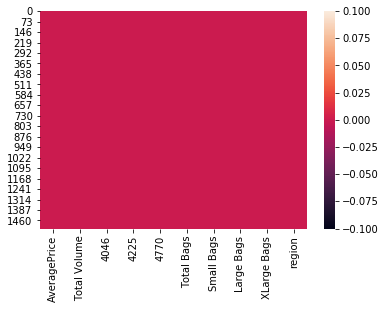

In [22]:
sns.heatmap(df.isnull())  #checking null values using heatmap

In [23]:
df.skew()     #checking skewness in columns

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

In [24]:
df['Total Volume']=np.log1p(df['Total Volume'])    #removing skewness from the columns

In [25]:
df['Total Volume'].skew()

0.6674677788629568

In [26]:
df['4046']=np.log1p(df['4046'])

In [27]:
df['4225']=np.log1p(df['4225'])

In [28]:
df['4770']=np.log1p(df['4770'])

In [29]:
df['Total Bags']=np.log1p(df['Total Bags'])

In [30]:
df['Small Bags']=np.log1p(df['Small Bags'])

In [31]:
df['Large Bags']=np.log1p(df['Large Bags'])

In [32]:
df['XLarge Bags']=np.log1p(df['XLarge Bags'])

In [33]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
region          0.288146
dtype: float64

In [34]:
#visualizing the data using various visualization techniques

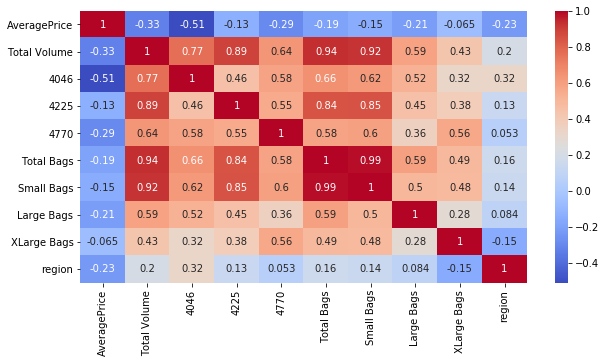

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

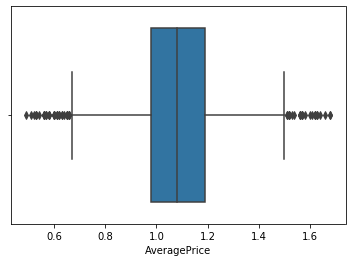

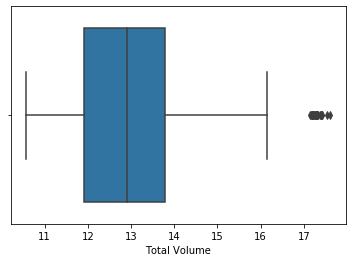

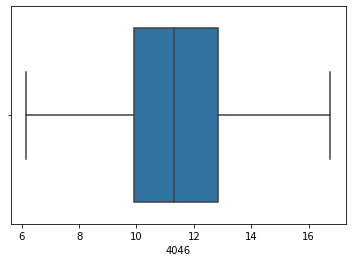

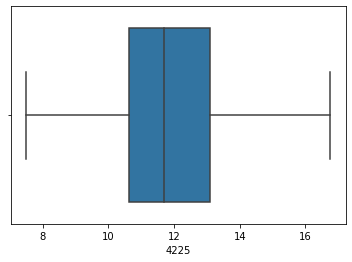

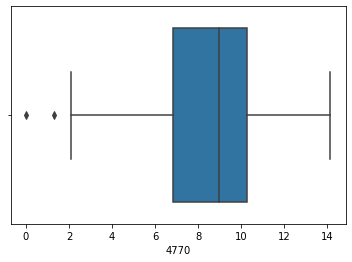

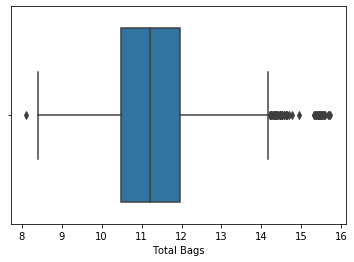

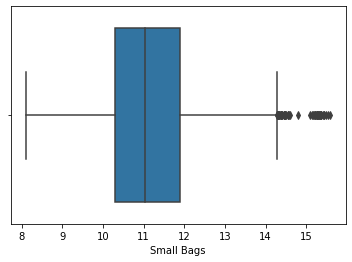

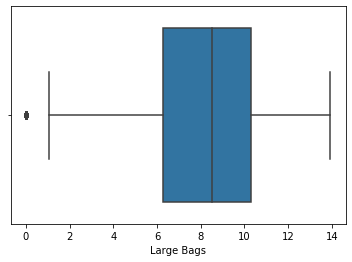

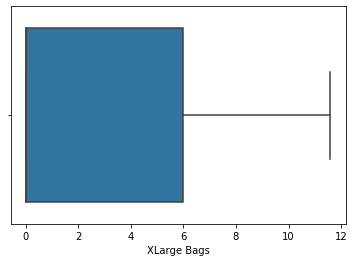

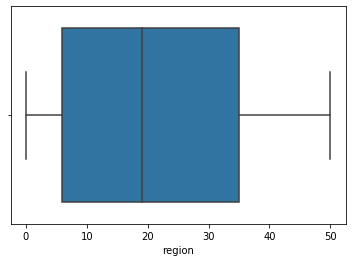

In [36]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

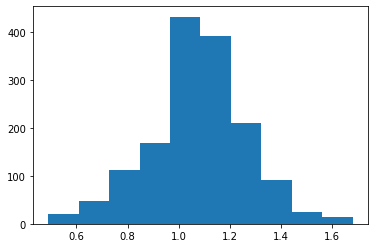

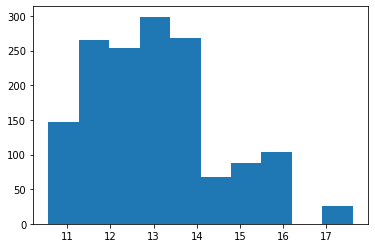

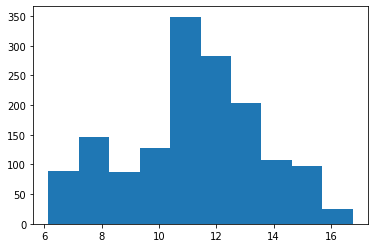

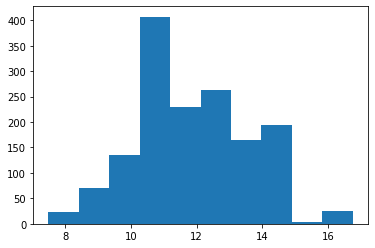

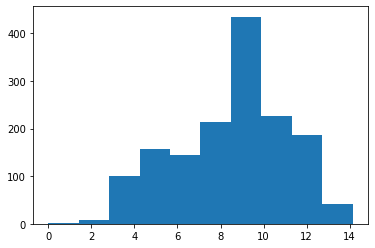

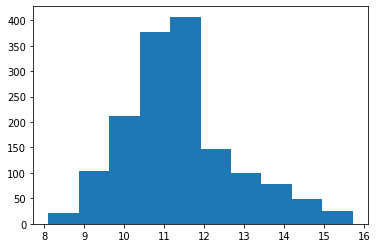

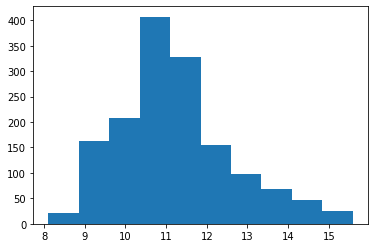

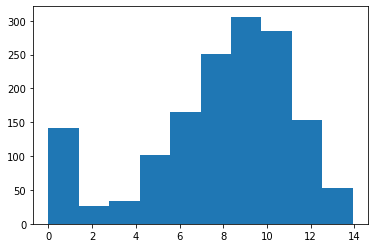

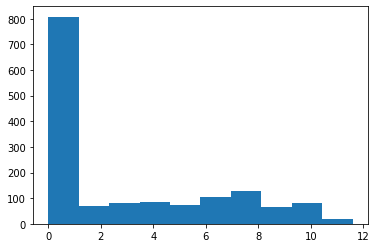

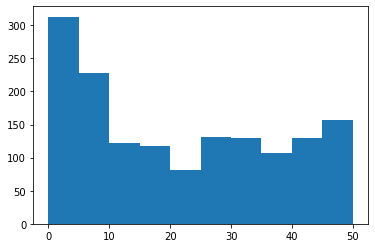

In [37]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

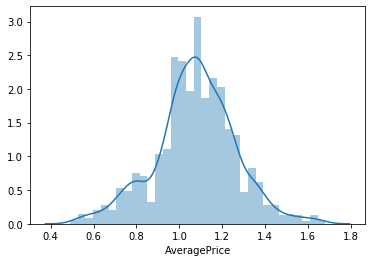

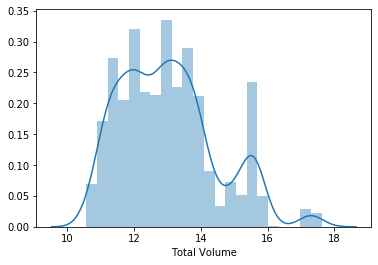

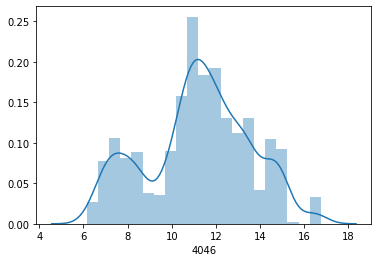

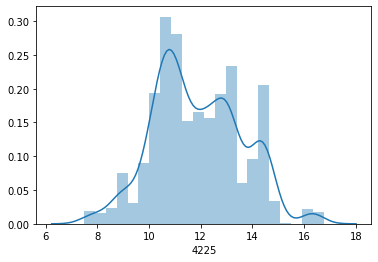

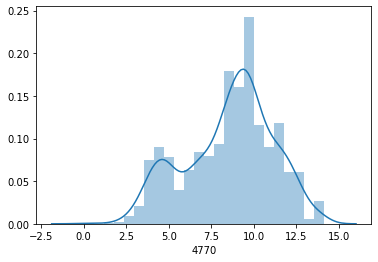

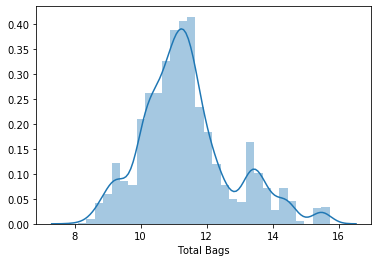

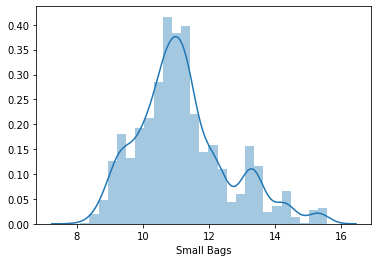

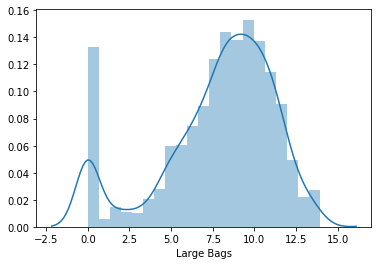

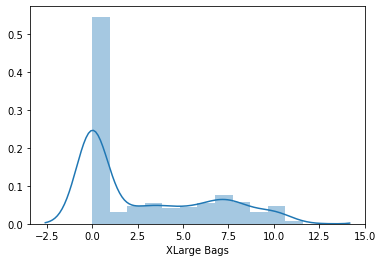

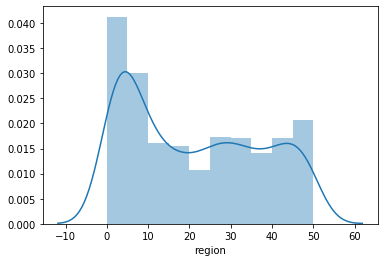

In [38]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

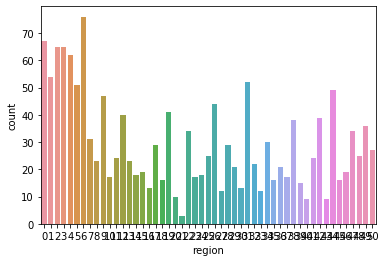

In [39]:
sns.countplot(df['region'])

In [40]:
#removing outliers

In [41]:
from scipy.stats import zscore

In [42]:
z=np.abs(zscore(df))

In [43]:
threshold=3
print(np.where(z>3))

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
df_new.shape      #this is the shape of the dataset after removing outliers

(1502, 10)

In [46]:
df.shape

(1517, 10)

In [47]:
#splitting the data in x and y

In [48]:
x=df.drop('AveragePrice',axis=1)

In [49]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0


In [50]:
y=df['AveragePrice'].values
y=y.reshape(-1,1)

In [51]:
x.shape

(1517, 9)

In [52]:
y.shape

(1517, 1)

In [53]:
from sklearn.preprocessing import StandardScaler   #standardizing the result to bring mean to 0 and std deviation to 1. 

In [54]:
std=StandardScaler()

In [55]:
x1=std.fit_transform(x)

In [56]:
x1=pd.DataFrame(data=x)

In [57]:
x1.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [59]:
max_r2_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r_score=r2_score(pred,y_test)
    print("r2 score for the random state ",r_state,"is ",r_score)
    if max_r2_score<r_score:
        max_r2_score=r_score
                
print()
print()

print("the max r2 score for the final random state:",r_state,"is: ",max_r2_score)

r2 score for the random state  30 is  -0.6582725408278529
r2 score for the random state  31 is  -0.6613923070646046
r2 score for the random state  32 is  -0.6758146448720976
r2 score for the random state  33 is  -0.7350355576001351
r2 score for the random state  34 is  -0.40614750350187
r2 score for the random state  35 is  -0.5607238422832999
r2 score for the random state  36 is  -0.6322184999222844
r2 score for the random state  37 is  -0.46738379836985744
r2 score for the random state  38 is  -0.46345160452169076
r2 score for the random state  39 is  -0.6531755635859204
r2 score for the random state  40 is  -0.3783212940525347
r2 score for the random state  41 is  -0.41111006122258487
r2 score for the random state  42 is  -0.6854505296500599
r2 score for the random state  43 is  -0.5536972546029086
r2 score for the random state  44 is  -0.4357262509956792
r2 score for the random state  45 is  -0.5477616739356541
r2 score for the random state  46 is  -0.5948552718142486
r2 score for 

In [60]:
#from above result we conclude that linear regressor model proves to be a bad model for predicting the above result

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [62]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.33)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.753541613450804
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 0.06731736526946108
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 0.008522195608782434
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.48503107202050777
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 0.10455920032264361
SVR(C=1.0,

In [64]:
#so from the above we came to the conclusion that knn proves to be the best model with random state as 99

In [65]:
#finalising the model as we get better score from knn algorithm

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.33)

In [67]:
knn=KNeighborsRegressor()

In [68]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [69]:
pred=knn.predict(x_test)

In [70]:
r2_score(y_test,pred)

0.753541613450804

In [71]:
mean_absolute_error(y_test,pred)

0.06731736526946108

In [72]:
mean_squared_error(y_test,pred)

0.008522195608782434

In [73]:
from sklearn.ensemble import AdaBoostRegressor   #boosting the result using ensemble technique

In [74]:
a=AdaBoostRegressor(base_estimator=knn,n_estimators=150,learning_rate=0.01)

In [75]:
a.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                  learning_rate=0.01, loss='linear', n_estimators=150,
                  random_state=None)

In [76]:
predad=a.predict(x_test)

In [77]:
r2_score(y_test,predad)

0.7676927009900484

In [78]:
from sklearn.model_selection import cross_val_score 

In [79]:
score=cross_val_score(knn,x,y,cv=5)

In [80]:
score

array([-2.01792282, -0.90677587,  0.1580783 , -1.2855715 ,  0.25493143])

In [81]:
#saving the final model

In [82]:
from sklearn.externals import joblib

In [83]:
filename='avocado_knnR'

In [84]:
joblib.dump(knn,filename)

['avocado_knnR']

NOW WE WILL PREDICT THE REGION(TARGET VARIABLE) USING CLASSIFICATION ALGORITHM 

In [85]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0


In [86]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [87]:
ds=df.copy()

In [88]:
ds.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0


In [89]:
ds.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
region          0.288146
dtype: float64

In [90]:
x=ds.drop('region',axis=1)

In [91]:
x=pd.DataFrame(data=x)

In [92]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0


In [93]:
x.shape

(1517, 9)

In [94]:
y=ds['region'].values

In [95]:
y=y.reshape(-1,1)

In [96]:
y.shape

(1517, 1)

In [97]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [98]:
model=[MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.33)

In [99]:
for i in model:
    i.fit(x_train,y_train)
    print(i.score(x_train,y_train))    
    p=i.predict(x_test)
    print("accuracy score of:",i,"is",accuracy_score(p,y_test))
    print("classification report of",i,"is:",classification_report(p,y_test))
    print("confusion matrix of",i,"is",confusion_matrix(p,y_test))

0.265748031496063
accuracy score of: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is 0.23552894211576847
classification report of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is:               precision    recall  f1-score   support

           0       0.95      0.31      0.47        68
           1       0.24      0.36      0.29        11
           2       0.16      0.09      0.12        32
           3       0.20      0.70      0.31        10
           4       0.12      0.30      0.18        10
           5       0.07      0.50      0.12         2
           6       1.00      0.15      0.26       133
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.17      1.00      0.29         2
          13       0.00      0.00   

0.6328740157480315
accuracy score of: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.6147704590818364
classification report of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:               precision    recall  f1-score   support

           0       1.00      0.71      0.83        31
           1       0.88      0.79      0.83        19
           2       1.00      0.58      0.73        33
           3       0.66      0.92      0.77        25
           4       0.88      0.66      0.75        32
           5       0.71      0.83      0.77        12
           6       1.00      0.5

In [116]:
#so from the above result we conclude that Knn is the better algorithm for the above dataset with accuracy score of 88%

In [101]:
knn=KNeighborsClassifier()

In [102]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
pred=knn.predict(x_test)

In [104]:
accuracy_score(pred,y_test)

0.8822355289421158

In [105]:
from sklearn.ensemble import RandomForestClassifier   #boosting the result using Randomforest classifier ensembling technique

In [106]:
rd=RandomForestClassifier()

In [107]:
rd.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
predrd=rd.predict(x_test)

In [109]:
accuracy_score(predrd,y_test)

0.9500998003992016

In [110]:
a=pd.DataFrame(data=predrd)

In [117]:
a.to_csv('knn_classifier avocado result.csv')   #saved the predicted result in csv form

In [112]:
#so from the above we have boosted the result using random forest classifier

In [113]:
#saving the above model

In [114]:
filename='avocado_classifier'

In [115]:
joblib.dump(knn,filename)

['avocado_classifier']